<a href="https://colab.research.google.com/github/SaadatAliPhd/JavaScript/blob/MachineLearning/exitDose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.0 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
PATH='/content/drive/MyDrive'
print("Number of DICOM files:", len(os.listdir(PATH+'/dicom_dir')))

Number of DICOM files: 7


In [12]:
import pydicom as dicom

In [13]:
dicom_file_dataset = dicom.dcmread('/content/drive/MyDrive/dicom_dir/RI.3_fraction.dcm')
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.62.1.5085902738044981962.2925451381252294304
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002, 0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'PORTAL', 'ACQUIRED_DOSE']
(0008, 0012) Instance Creation Date              DA: '20230830'
(0008, 0013) Instance Creation Time              TM: '124413'
(0008, 0016) SOP Class UID                       UI: RT Image Storage
(0008, 0018

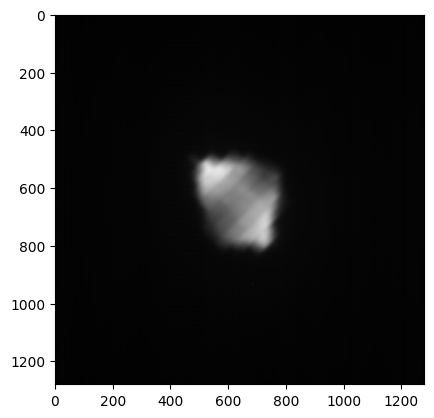

In [14]:
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

# The path to a pydicom test dataset
path = '/content/drive/MyDrive/dicom_dir/RI.1_fraction.dcm'
ds = dcmread(path)
# `arr` is a numpy.ndarray
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the reference fluence map DICOM image
reference_dicom_path = '/content/drive/MyDrive/dicom_dir/RI.1_fraction.dcm'
reference_dicom = dcmread(reference_dicom_path)
reference_fluence_map = reference_dicom.pixel_array

In [21]:
# Step 2: Load the fluence maps of the patient
# Assuming you have a list of paths to the patient's fluence map DICOM files
patient_dicom_paths = ['/content/drive/MyDrive/dicom_dir/RI.2_fraction.dcm', '/content/drive/MyDrive/dicom_dir/RI.3_fraction.dcm','/content/drive/MyDrive/dicom_dir/RI.4_fraction_instance_1.dcm','/content/drive/MyDrive/dicom_dir/RI.4_fraction_instance_2.dcm','/content/drive/MyDrive/dicom_dir/RI.5_fraction.dcm']
patient_fluence_maps = []

for dicom_path in patient_dicom_paths:
    dicom_data = dcmread(dicom_path)
    fluence_map = dicom_data.pixel_array
    patient_fluence_maps.append(fluence_map)

In [22]:
# Step 3: Calculate the differences between patient fluence maps and the reference fluence map
differences = []

for patient_fluence_map in patient_fluence_maps:
    # Calculate pixel-wise absolute differences
    diff = np.abs(patient_fluence_map - reference_fluence_map)

    # Calculate a summary statistic of the differences (e.g., mean absolute difference)
    mean_diff = np.mean(diff)
    differences.append(mean_diff)

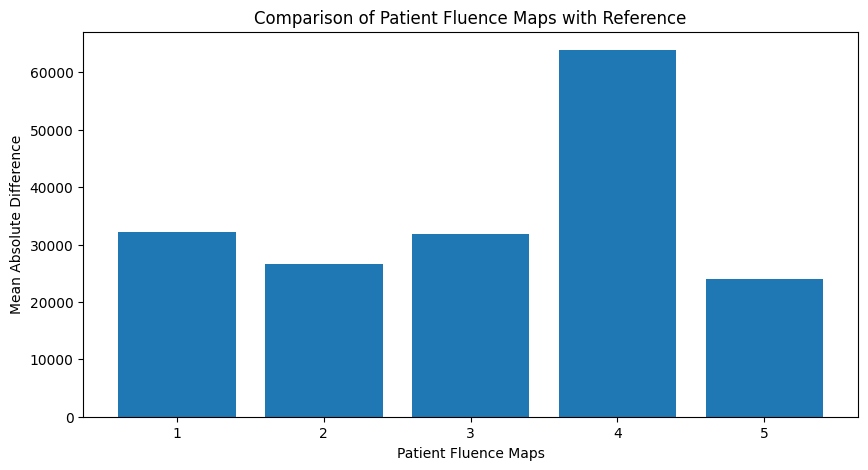

In [23]:
# Step 4: Visualize the differences
plt.figure(figsize=(10, 5))
plt.bar(range(len(differences)), differences)
plt.xlabel('Patient Fluence Maps')
plt.ylabel('Mean Absolute Difference')
plt.title('Comparison of Patient Fluence Maps with Reference')
plt.xticks(range(len(differences)), range(1, len(differences) + 1))  # Patient image labels
plt.show()